## Fertilizer Prediction

* Attributes Description

Variable | Description
--------------|-----------
Temperature | Temperature in degree Celsius
Humidity | Relative humidity in %
Moisture |  Ratio of the mass of water
Soil Type | Types of Soils
Crop Type | Type of Crops
Nitrogen | Amount(%) of Nitrogen in Soil 
Potassium | Amount(%) of Potassium in Soil
Phosphorous | Amount(%) of Phosphorous in Soil
Fertilizer Name | Various types of Fertilizers used for different types of Soils & Crops


### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [2]:
Data_path = "../raw data/Fertilizer Prediction.csv"

In [3]:
df = pd.read_csv(Data_path)
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
# Statistical info
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [5]:
# Datatypes of Attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [6]:
# Check the unique values in dataset
df.apply(lambda x: len(x.unique()))

Temparature        14
Humidity           13
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

### Preprocessing the Dataset

In [7]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [8]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Soil Type', 'Crop Type', 'Fertilizer Name']

In [9]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Soil Type
Loamy     21
Sandy     20
Clayey    20
Red       19
Black     19
Name: Soil Type, dtype: int64

Crop Type
Sugarcane      13
Cotton         12
Millets        11
Pulses         10
Paddy          10
Wheat           9
Barley          7
Oil seeds       7
Tobacco         7
Ground Nuts     7
Maize           6
Name: Crop Type, dtype: int64

Fertilizer Name
Urea        22
DAP         18
28-28       17
20-20       14
14-35-14    14
10-26-26     7
17-17-17     7
Name: Fertilizer Name, dtype: int64



### Exploratory Data Analysis

<AxesSubplot:xlabel='Soil Type', ylabel='count'>

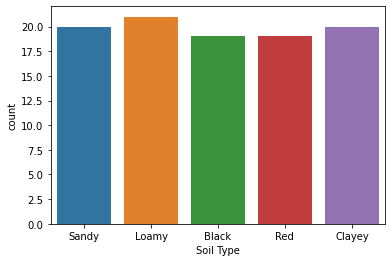

In [10]:
sns.countplot(df['Soil Type'])

<AxesSubplot:xlabel='Crop Type', ylabel='count'>

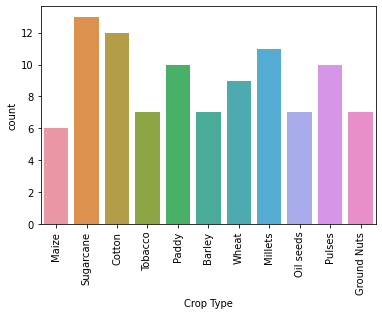

In [11]:
plt.xticks(rotation=90)
sns.countplot(df['Crop Type'])

<AxesSubplot:xlabel='Fertilizer Name', ylabel='count'>

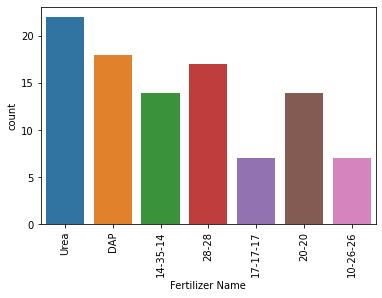

In [12]:
plt.xticks(rotation=90)
sns.countplot(df['Fertilizer Name'])

In [13]:
# Defining function for Continuous and Catogorical variable

def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Distribution')
    sns.distplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with Output Variable')
    sns.boxplot(y = x,x = df['Fertilizer Name'])
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with Output Variable')
    sns.countplot(x = x,hue = df['Fertilizer Name'], ax=axes[1])

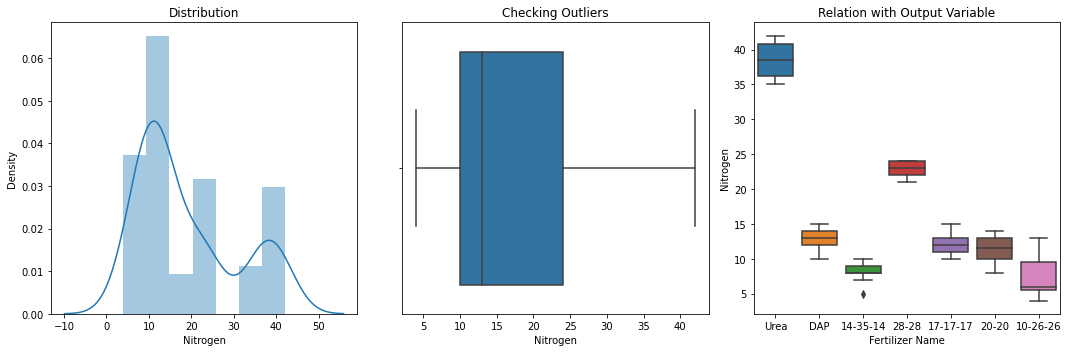

In [14]:
# EDA - Nitrogen variable
plot_conti(df['Nitrogen'])

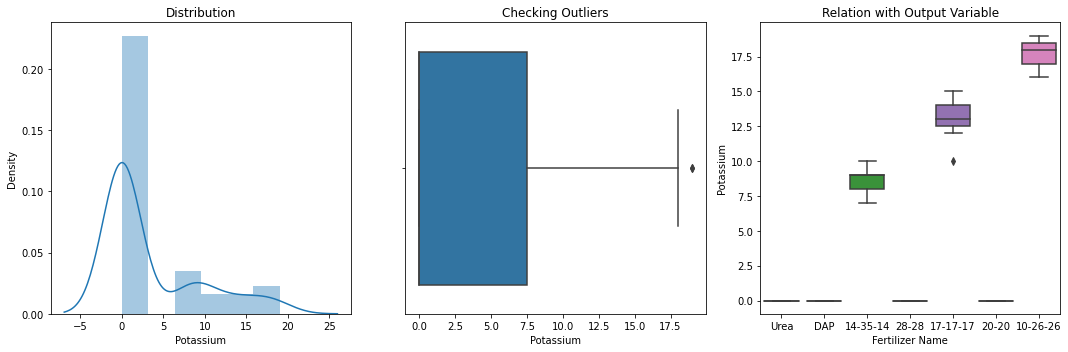

In [15]:
# EDA - Potassium variable
plot_conti(df['Potassium'])

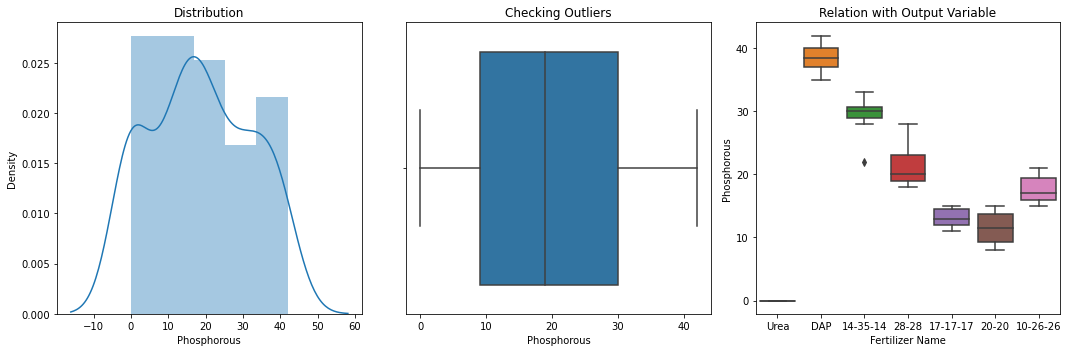

In [16]:
# EDA - Phosphorous variable
plot_conti(df['Phosphorous'])

## Correlation Matrix

<AxesSubplot:>

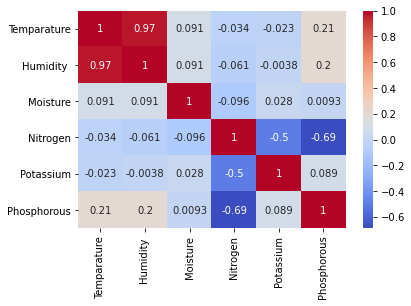

In [17]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Input split

In [18]:
# Check the number of zeroes in a Column
# Delete or Drop columns if zero values are more than 50%

sum(df['Potassium'] == 0)

71

In [19]:
X = df.drop(columns = ['Fertilizer Name', 'Potassium', 'Temparature'], axis=1)
y = df['Fertilizer Name']

In [20]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


### Encoding Categorical Data

* Independent Variable
  - OneHotEncoder

* Dependent Variable
  - LebelEncoder

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [22]:
X.shape

(99, 20)

### Splitting the dataset into the Training set and Test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
# Initializing empty lists to append all model's name and corresponding name
accuracy = []
model = []

### Training the Model on the Training set

## K - Nearest Neighbors

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_knn = sc.fit_transform(X_train[:, 16:])
X_test_knn = sc.transform(X_test[:, 16:])

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train_knn, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test_knn)


In [26]:
# accuracy of k-nn model
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
accuracy.append(acc1)
model.append('K-Nearest Neighbors')
print("K-Nearest Neighbours's Accuracy :\n", acc1)

K-Nearest Neighbours's Accuracy :
 0.75


In [27]:
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
print("Cross-Validation Score:\n", score)

Cross-Validation Score:
 [0.85       0.85       0.8        0.65       0.52631579]


In [28]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         3
    14-35-14       1.00      0.50      0.67         4
    17-17-17       0.50      1.00      0.67         1
       20-20       0.25      1.00      0.40         1
       28-28       1.00      1.00      1.00         5
         DAP       0.67      1.00      0.80         2
        Urea       1.00      1.00      1.00         4

    accuracy                           0.75        20
   macro avg       0.63      0.79      0.65        20
weighted avg       0.75      0.75      0.72        20



## Kernel SVM

In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# # Making the Confusion Matrix and Calculating the Accuracy
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# print("\n",cm)

In [30]:
# accuracy of SVM model
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_test, y_pred)
accuracy.append(acc2)
model.append('Kernel SVM')
print("Kernel SVM's Accuracy :\n", acc2)

Kernel SVM's Accuracy :
 0.55


In [31]:
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
print("Cross-Validation Score:\n", score)

Cross-Validation Score:
 [0.7        0.55       0.55       0.65       0.47368421]


In [32]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         3
    14-35-14       0.00      0.00      0.00         4
    17-17-17       0.00      0.00      0.00         1
       20-20       0.14      1.00      0.25         1
       28-28       1.00      0.80      0.89         5
         DAP       0.40      1.00      0.57         2
        Urea       1.00      1.00      1.00         4

    accuracy                           0.55        20
   macro avg       0.36      0.54      0.39        20
weighted avg       0.50      0.55      0.49        20



## Decision Tree Classification

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [34]:
# accuracy of DT model
from sklearn.metrics import accuracy_score
acc4 = accuracy_score(y_test, y_pred)
accuracy.append(acc4)
model.append('Decision Tree Classification')
print("Decision Tree Classification's Accuracy :\n", acc4)

Decision Tree Classification's Accuracy :
 0.85


In [35]:
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
print("Cross-Validation Score:\n", score)

Cross-Validation Score:
 [0.85       0.85       0.8        0.85       0.94736842]


In [36]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    10-26-26       0.67      0.67      0.67         3
    14-35-14       1.00      0.75      0.86         4
    17-17-17       0.00      0.00      0.00         1
       20-20       0.33      1.00      0.50         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         4

    accuracy                           0.85        20
   macro avg       0.71      0.77      0.72        20
weighted avg       0.87      0.85      0.85        20



## Random Forest Classification

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

In [38]:
# accuracy of RF model 
from sklearn.metrics import accuracy_score
acc5 = accuracy_score(y_test, y_pred)
accuracy.append(acc5)
model.append('Random Forest Classification')
print("Random Forest Classification's Accuracy:\n", acc5)

Random Forest Classification's Accuracy:
 0.9


In [39]:
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
print("Cross-Validation Score:", score)

Cross-Validation Score: [0.85       0.85       0.9        0.75       0.84210526]


In [40]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    10-26-26       1.00      0.67      0.80         3
    14-35-14       0.80      1.00      0.89         4
    17-17-17       0.00      0.00      0.00         1
       20-20       0.50      1.00      0.67         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         4

    accuracy                           0.90        20
   macro avg       0.76      0.81      0.77        20
weighted avg       0.89      0.90      0.88        20



## Model Accuracy

<AxesSubplot:>

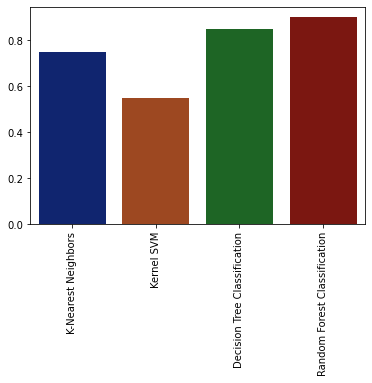

In [41]:
plt.xticks(rotation=90)
sns.barplot(x = model, y = accuracy, palette ='dark')

In [42]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


## Prediction 

In [43]:
# # Predicting the test set results
# y_pred = classifier.predict(X_test)
# print("prediction is here:", y_pred[6])